<a href="https://colab.research.google.com/github/gghayes98/CSE450/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

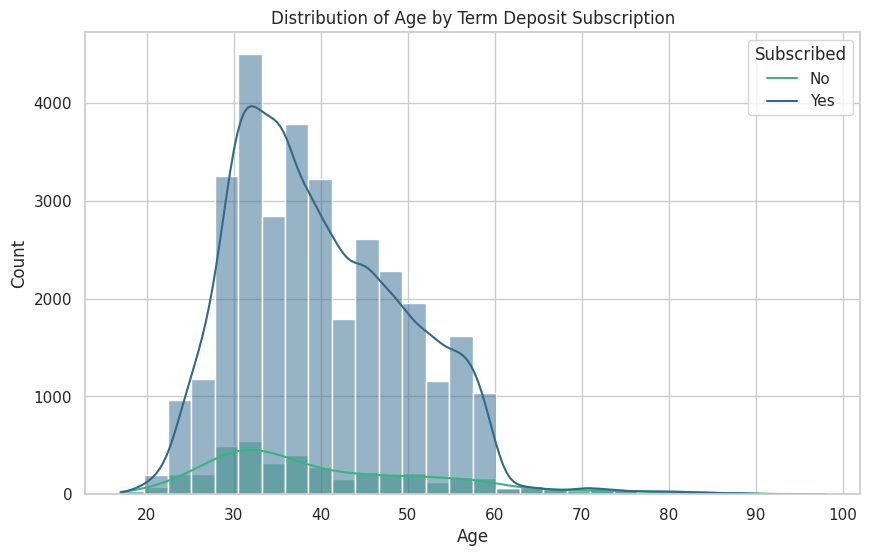

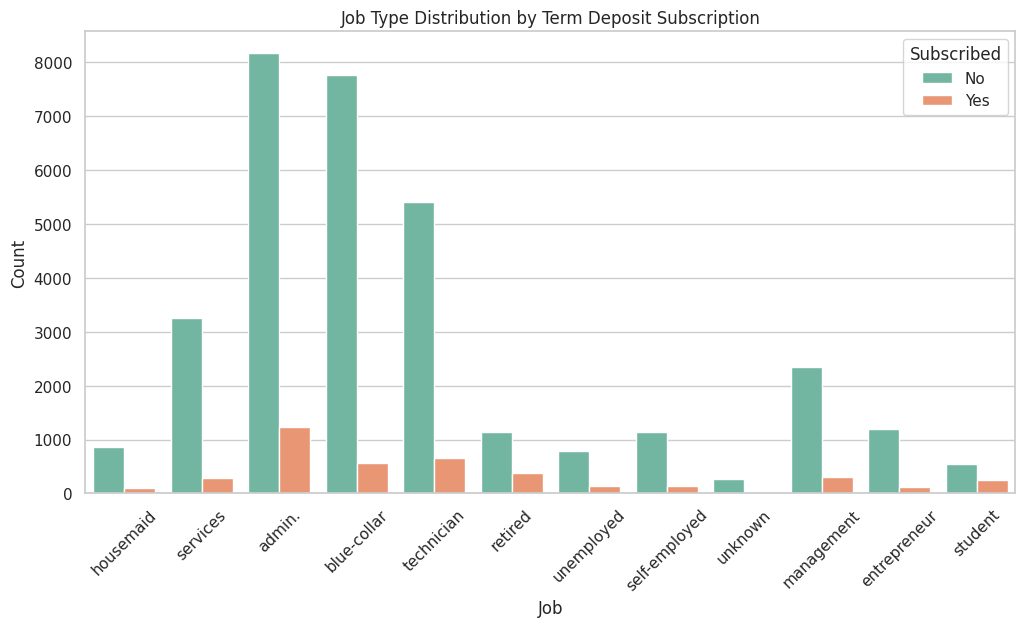

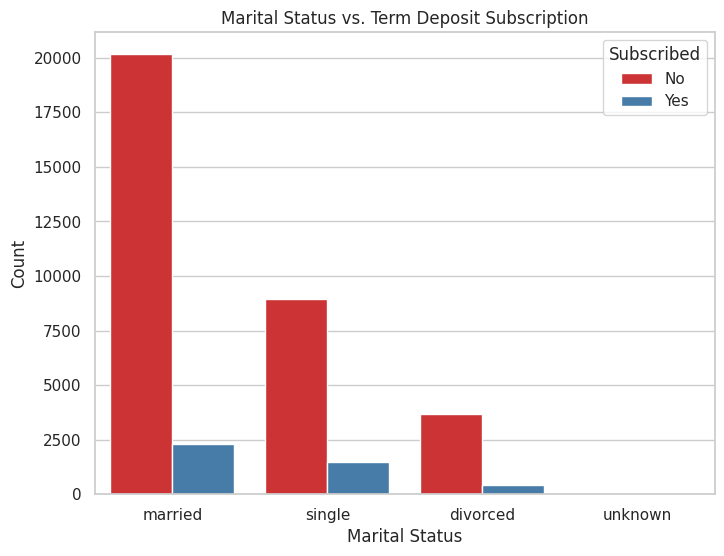

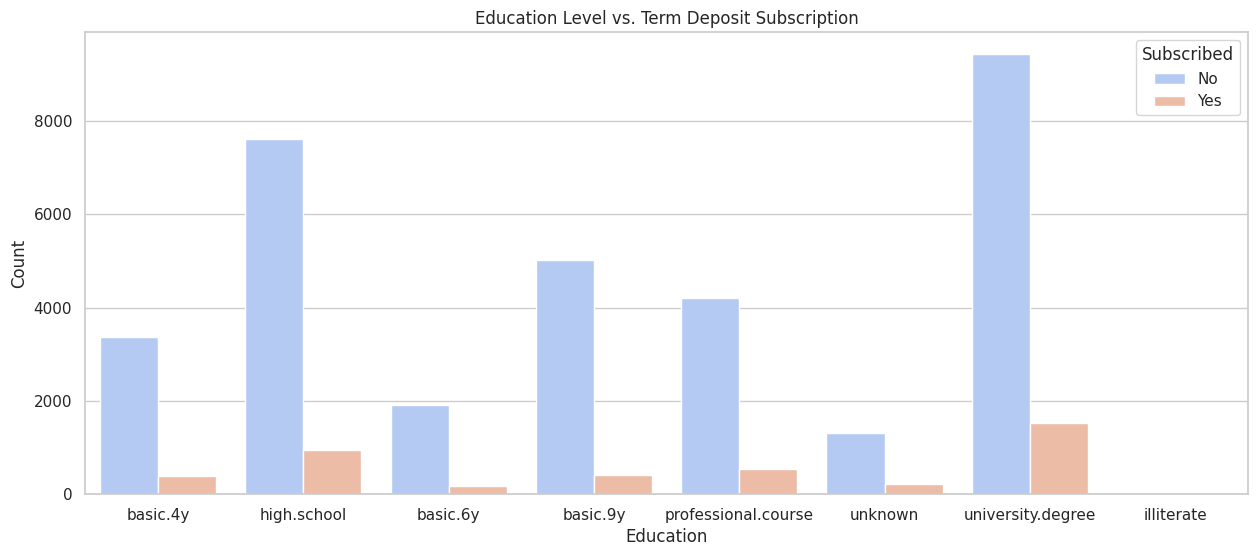

Correlation of each feature with y:
age               0.031650
campaign         -0.066148
pdays            -0.328805
previous          0.232235
emp.var.rate     -0.300816
cons.price.idx   -0.135638
cons.conf.idx     0.051853
euribor3m        -0.311169
nr.employed      -0.358848
Name: y, dtype: float64


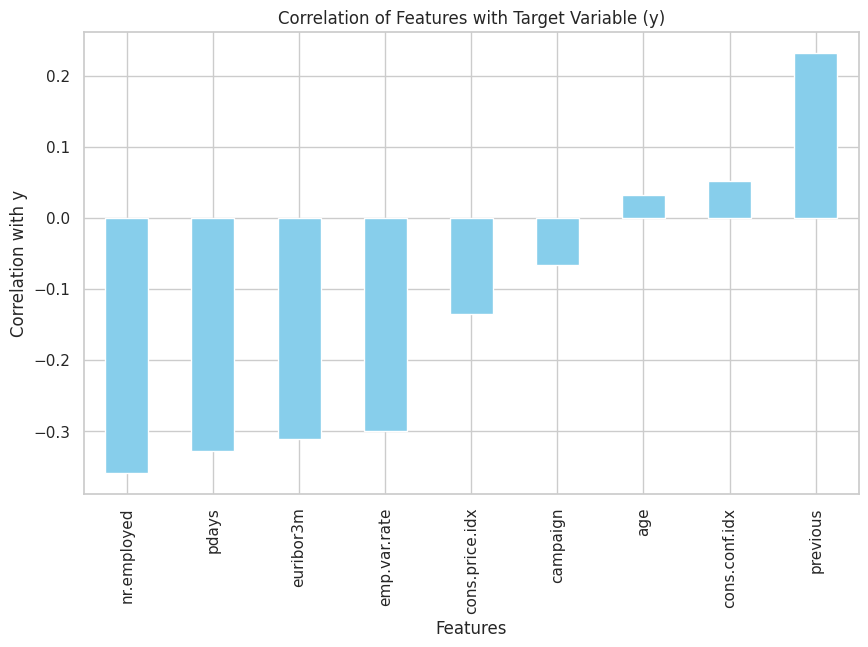

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

# Configure Seaborn style
sns.set(style="whitegrid")

# -----------------------------------------------
# Distribution of Age by Term Deposit Subscription
# -----------------------------------------------
plt.figure(figsize=(10, 6))
# 'y' is the target variable (subscribe: yes/no)
sns.histplot(data=campaign, x='age', hue='y', kde=True, bins=30, palette="viridis")
plt.title("Distribution of Age by Term Deposit Subscription")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

# -----------------------------------------------
# Job Types by Term Deposit Subscription
# -----------------------------------------------
plt.figure(figsize=(12, 6))
sns.countplot(data=campaign, x='job', hue='y', palette="Set2")
plt.title("Job Type Distribution by Term Deposit Subscription")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

# -----------------------------------------------
# Marital Status vs. Term Deposit Subscription
# -----------------------------------------------
plt.figure(figsize=(8, 6))
sns.countplot(data=campaign, x='marital', hue='y', palette="Set1")
plt.title("Marital Status vs. Term Deposit Subscription")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

# -----------------------------------------------
# Education Level vs. Term Deposit Subscription
# -----------------------------------------------
plt.figure(figsize=(15, 6))
sns.countplot(data=campaign, x='education', hue='y', palette="coolwarm")
plt.title("Education Level vs. Term Deposit Subscription")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()

# -----------------------------------------------
# Correlations as a bar chart
# -----------------------------------------------

# Convert target variable 'y' to numeric (0 for 'no', 1 for 'yes')
campaign_numeric = campaign.copy()
campaign_numeric['y'] = campaign_numeric['y'].map({'no': 0, 'yes': 1})

# Select only numeric columns (including y)
numeric_cols = campaign_numeric.select_dtypes(include='number')

# Compute correlations with the target variable y
correlations = numeric_cols.corr()['y'].drop('y')  # Drop y itself to only show feature correlations

# Print the correlation values
print("Correlation of each feature with y:")
print(correlations)

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Target Variable (y)")
plt.xlabel("Features")
plt.ylabel("Correlation with y")
plt.show()
